In [1]:
import os
from email import policy
from email.parser import BytesParser
import shutil

directorio_correos = 'C:/Users/Rick/Desktop/OVT/entrantes'

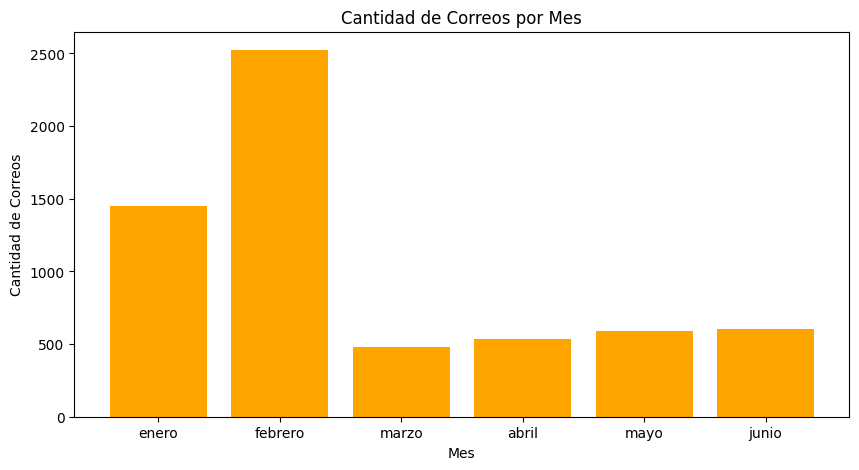

In [2]:
import os
import matplotlib.pyplot as plt
def cotar_correos_mes(directorio):
    contador = {}
    for mes in ["enero", "febrero", "marzo", "abril", "mayo", "junio"]:
        directorio_mes = os.path.join(directorio, mes)
        if os.path.exists(directorio_mes):
            contador[mes] = len([name for name in os.listdir(directorio_mes) if name.endswith('.eml')])
        else:
            contador[mes] = 0
    return contador

contador = cotar_correos_mes(directorio_correos)

meses = list(contador.keys())
conteo = list(contador.values())

plt.figure(figsize=(10, 5))
plt.bar(meses, conteo, color='orange')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Correos')
plt.title('Cantidad de Correos por Mes')
plt.show()

In [3]:
print(meses, conteo)

['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio'] [1448, 2523, 477, 537, 592, 605]


Continuaremos con las tecnicas de preprocesamiento de datos, aplicaremos la conversión de los caracteres aminusculas, se eiliminaran las URL's adjuntas, se eliminaran las etiquetas HTML, se eliminaran los caracteres especiales y de puntuación ademas se realizara la tokenización respecto a palabras vacias y la lematización

In [4]:
!pip install beautifulsoup4 nltk spacy
!python -m spacy download es_core_news_sm

     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     ---------------- ----------------------- 5.2/12.9 MB 31.9 MB/s eta 0:00:01
     ------------------------- -------------- 8.1/12.9 MB 21.9 MB/s eta 0:00:01
     ---------------------------------- ---- 11.3/12.9 MB 19.0 MB/s eta 0:00:01
     --------------------------------------- 12.9/12.9 MB 17.6 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [12]:
!pip install eml-parser

In [5]:
import os
from email import policy
from email.parser import BytesParser
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import nltk

nltk.download('punkt')
nltk.download('stopwords')

nlp = spacy.load('es_core_news_sm')
stop_words = set(stopwords.words('spanish'))

def parse_email(ruta):
    with open(ruta, 'rb') as f:
        correo = BytesParser(policy=policy.default).parse(f)
    return correo

def get_text_from_email(email):
    if email.is_multipart():
        for part in email.walk():
            content_type = part.get_content_type()
            content_disposition = str(part.get("Content-Disposition"))
            if content_type == "text/plain" and "attachment" not in content_disposition:
                charset = part.get_content_charset() or 'utf-8'
                return part.get_payload(decode=True).decode(charset, errors="ignore")
    else:
        charset = email.get_content_charset() or 'utf-8'
        return email.get_payload(decode=True).decode(charset, errors="ignore")
    return None

def preprocesar_texto(texto):
    soup = BeautifulSoup(texto, 'html.parser')
    texto = soup.get_text()

    texto = texto.lower()
    texto = re.sub(r'http\S+|www.\S+', '', texto)
    texto = re.sub(r'\S+@\S+', '', texto)
    texto = re.sub(r'[^a-zA-Z0-9\s]', '', texto)

    tokens = word_tokenize(texto)
    tokens = [palabra for palabra in tokens if palabra not in stop_words]
    tokens = [nlp(palabra)[0].lemma_ for palabra in tokens]

    return ' '.join(tokens)

def preprocesar_correos(ruta, ruta_salida):
    os.makedirs(ruta_salida, exist_ok=True)
    for mes in ["enero", "febrero", "marzo", "abril", "mayo", "junio"]:
        directorio_meses = os.path.join(ruta, mes)
        directorio_salida_mes = os.path.join(ruta_salida, mes)
        os.makedirs(directorio_salida_mes, exist_ok=True)
        if not os.path.exists(directorio_meses):
            print(f"Directorio {directorio_meses} no existe.")
            continue
        for raiz, _, archivos in os.walk(directorio_meses):
            for archivo in archivos:
                if archivo.endswith('.eml'):
                    ruta_archivo = os.path.join(raiz, archivo)
                    correo = parse_email(ruta_archivo)
                    cuerpo = get_text_from_email(correo)
                    if cuerpo:
                        cuerpo_preprocesado = preprocesar_texto(cuerpo)
                        nombre_archivo_salida = os.path.join(directorio_salida_mes, archivo.replace('.eml', '.txt'))
                        with open(nombre_archivo_salida, 'w', encoding='utf-8') as f:
                            f.write(cuerpo_preprocesado)
                        print(f"Correo procesado y guardado: {nombre_archivo_salida}")
                    else:
                        print(f"No se encontró cuerpo de texto en: {ruta_archivo}")

directorio_entrante = "C:/Users/Rick/Desktop/OVT/entrantes"
directorio_salida = "C:/Users/Rick/Desktop/OVT/entrantes_procesados"
preprocesar_correos(directorio_entrante, directorio_salida)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rick\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rick\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Correo procesado y guardado: C:/Users/Rick/Desktop/OVT/entrantes_procesados\enero\0000047637-Error en la pagina de la OVT 15 de octubre.txt
Correo procesado y guardado: C:/Users/Rick/Desktop/OVT/entrantes_procesados\enero\0000079406-RECLAMO POR COMUNICADO DE INCUMPLIMIENTO DE PRESENTACION DE PLANILLAS.txt
Correo procesado y guardado: C:/Users/Rick/Desktop/OVT/entrantes_procesados\enero\0000085895-Consulta-Cambio de Contraseña Min. Trabajo.txt
Correo procesado y guardado: C:/Users/Rick/Desktop/OVT/entrantes_procesados\enero\0000085896-CONSULTA CAMBIO DE CONTRASEÑA MINISTERIO DE TRABAJO-EMPRESA VMELITE BOLIVIA S.R.L.txt
Correo procesado y guardado: C:/Users/Rick/Desktop/OVT/entrantes_procesados\enero\0000085935-RE_ CONSULTA CAMBIO DE CONTRASEÑA MINISTERIO DE TRABAJO-EMPRESA VMELITE BOLIVIA S.R.L.txt
Correo procesado y guardado: C:/Users/Rick/Desktop/OVT/entrantes_procesados\enero\0000085937-RE_ CONSULTA CAMBIO DE CONTRASEÑA MINISTERIO DE TRABAJO-EMPRESA VMELITE BOLIVIA S.R.L.txt
Correo p

C:\Users\Rick\AppData\Local\Temp\ipykernel_5200\1590876409.py:36: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(texto, 'html.parser')


Correo procesado y guardado: C:/Users/Rick/Desktop/OVT/entrantes_procesados\enero\0000110587-RE_ INCUMPLIMIENTO CON LA PRESENTACIÓN DE PLANILLAS- DESCARGO CONCUADRA SRL.txt
Correo procesado y guardado: C:/Users/Rick/Desktop/OVT/entrantes_procesados\enero\0000110590-PRESENTACIÓN DE PLANILLAS GRUPO GEO SRL G-2023.txt
Correo procesado y guardado: C:/Users/Rick/Desktop/OVT/entrantes_procesados\enero\0000110593-RE_ INCUMPLIMIENTO CON LA PRESENTACIÓN DE PLANILLAS.txt
Correo procesado y guardado: C:/Users/Rick/Desktop/OVT/entrantes_procesados\enero\0000110594-RE_ INCUMPLIMIENTO CON LA PRESENTACIÓN DE PLANILLAS.txt
Correo procesado y guardado: C:/Users/Rick/Desktop/OVT/entrantes_procesados\enero\0000110608-RESPUESTA A INCUMPLIMIENTO CON LA PRESENTACIÓN DE PLANILLAS.txt
Correo procesado y guardado: C:/Users/Rick/Desktop/OVT/entrantes_procesados\enero\0000110609-Re_ INCUMPLIMIENTO CON LA PRESENTACIÓN DE PLANILLAS.txt
Correo procesado y guardado: C:/Users/Rick/Desktop/OVT/entrantes_procesados\ene

In [7]:
import os

problemas = {
    "planillas": ["mensual", "retroactiva", "aguinaldo", "rectificación", "fuera de plazo", "declaración en cero", "tipo de declaración", "no figura sucursal", "incumplimiento de declaración", "error al importar"],
    "roe": ["dar de baja el roe", "correo de confirmación", "multa rm105/18", "inicio de actividades", "sucursal inactiva", "inscripción al roe", "pendiente de firma", "actualizar roe", "error interno", "representante legal"],
    "trabajadores": ["no es jubilado", "retiro de trabajador", "no valida dependiente con discapacidad", "no valida trabajador"],
    "contraseña": ["contraseña"],
    "no ingresa a la ovt": ["no ingresa a la ovt", "no puedo ingresar", ],
    "error de sistema": ["error de sistema", "error en ingreso", "error al ingresar", "error ovt"],
    "falla de servidor": ["falla de servidor"]
}

def leer_archivo(ruta):
    with open(ruta, 'r', encoding='utf-8') as f:
        return f.read()

def clasificar_correo(contenido):
    clasificacion = {"principal": None, "secundario": None}
    for problema, keywords in problemas.items():
        for keyword in keywords:
            if keyword in contenido:
                clasificacion["principal"] = problema
                clasificacion["secundario"] = keyword
                return clasificacion
    return clasificacion

def procesar_correos(ruta):
    clasificaciones = []
    for mes in ["enero", "febrero", "marzo", "abril", "mayo", "junio"]:
        directorio_meses = os.path.join(ruta, mes)
        if not os.path.exists(directorio_meses):
            print(f"Directorio {directorio_meses} no existe.")
            continue
        for raiz, _, archivos in os.walk(directorio_meses):
            for archivo in archivos:
                if archivo.endswith('.txt'):
                    ruta_archivo = os.path.join(raiz, archivo)
                    contenido = leer_archivo(ruta_archivo)
                    clasificacion = clasificar_correo(contenido)
                    clasificaciones.append((ruta_archivo, clasificacion))
    return clasificaciones


directorio_procesados = "C:/Users/Rick/Desktop/OVT/entrantes_procesados"
clasificaciones = procesar_correos(directorio_procesados)

informe = []
for ruta_archivo, clasificacion in clasificaciones:
    informe.append(f"Archivo: {ruta_archivo}\nPrincipal: {clasificacion['principal']}\nSecundario: {clasificacion['secundario']}\n")

ruta_informe = os.path.join(directorio_procesados, "informe_clasificacion_uno.txt")
with open(ruta_informe, 'w', encoding='utf-8') as f:
    f.write("\n\n".join(informe))

print(f"Informe generado en {ruta_informe}")


Informe generado en C:/Users/Rick/Desktop/OVT/entrantes_procesados\informe_clasificacion_uno.txt


In [8]:
import os

problemas = {
    "planillas": ["mensual", "retroactiva", "aguinaldo", "rectificación", "fuera de plazo", "declaración en cero", "tipo de declaración", "no figura sucursal", "incumplimiento de declaración", "error al importar"],
    "roe": ["dar de baja el roe", "correo de confirmación", "multa rm105/18", "inicio de actividades", "sucursal inactiva", "inscripción al roe", "pendiente de firma", "actualizar roe", "error interno", "representante legal"],
    "trabajadores": ["no es jubilado", "retiro de trabajador", "no valida dependiente con discapacidad", "no valida trabajador"],
    "contraseña": ["contraseña"],
    "no ingresa a la ovt": ["no ingresa a la ovt"],
    "error de sistema": ["error de sistema"],
    "falla de servidor": ["falla de servidor"]
}

def leer_archivo(ruta):
    with open(ruta, 'r', encoding='utf-8') as f:
        return f.read()

def clasificar_correo(contenido):
    clasificacion = {"principal": None, "secundario": None}
    for problema, keywords in problemas.items():
        for keyword in keywords:
            if keyword in contenido:
                clasificacion["principal"] = problema
                clasificacion["secundario"] = keyword
                return clasificacion
    return clasificacion

def procesar_correos(ruta):
    clasificaciones = []
    conteo_principales = {k: 0 for k in problemas.keys()}
    conteo_secundarios = {k: 0 for v in problemas.values() for k in v}

    for mes in ["enero", "febrero", "marzo", "abril", "mayo", "junio"]:
        directorio_meses = os.path.join(ruta, mes)
        if not os.path.exists(directorio_meses):
            print(f"Directorio {directorio_meses} no existe.")
            continue
        for raiz, _, archivos in os.walk(directorio_meses):
            for archivo in archivos:
                if archivo.endswith('.txt'):
                    ruta_archivo = os.path.join(raiz, archivo)
                    contenido = leer_archivo(ruta_archivo)
                    clasificacion = clasificar_correo(contenido)
                    clasificaciones.append((ruta_archivo, clasificacion))
                    if clasificacion["principal"]:
                        conteo_principales[clasificacion["principal"]] += 1
                    if clasificacion["secundario"]:
                        conteo_secundarios[clasificacion["secundario"]] += 1

    return clasificaciones, conteo_principales, conteo_secundarios

directorio_procesados = "C:/Users/Rick/Desktop/OVT/entrantes_procesados"
clasificaciones, conteo_principales, conteo_secundarios = procesar_correos(directorio_procesados)

informe = []
for ruta_archivo, clasificacion in clasificaciones:
    informe.append(f"Archivo: {ruta_archivo}\nPrincipal: {clasificacion['principal']}\nSecundario: {clasificacion['secundario']}\n")

ruta_informe = os.path.join(directorio_procesados, "informe_clasificacion.txt")
with open(ruta_informe, 'w', encoding='utf-8') as f:
    f.write("\n\n".join(informe))

print(f"Informe generado en {ruta_informe}")

print("\nConteo de Problemas Principales:")
for problema, conteo in conteo_principales.items():
    print(f"{problema}: {conteo}")

print("\nConteo de Problemas Secundarios:")
for problema, conteo in conteo_secundarios.items():
    print(f"{problema}: {conteo}")


Informe generado en C:/Users/Rick/Desktop/OVT/entrantes_procesados\informe_clasificacion.txt

Conteo de Problemas Principales:
planillas: 1650
roe: 264
trabajadores: 0
contraseña: 0
no ingresa a la ovt: 0
error de sistema: 0
falla de servidor: 0

Conteo de Problemas Secundarios:
mensual: 1338
retroactiva: 1
aguinaldo: 305
rectificación: 6
fuera de plazo: 0
declaración en cero: 0
tipo de declaración: 0
no figura sucursal: 0
incumplimiento de declaración: 0
error al importar: 0
dar de baja el roe: 0
correo de confirmación: 0
multa rm105/18: 0
inicio de actividades: 0
sucursal inactiva: 0
inscripción al roe: 0
pendiente de firma: 0
actualizar roe: 54
error interno: 24
representante legal: 186
no es jubilado: 0
retiro de trabajador: 0
no valida dependiente con discapacidad: 0
no valida trabajador: 0
contraseña: 0
no ingresa a la ovt: 0
error de sistema: 0
falla de servidor: 0


In [10]:
import os
import re
from collections import defaultdict

problemas = {
    "planillas": [
        r'\bmensual\b', r'\bretroactiva\b', r'\baguinaldo\b', r'\brectificación\b', r'\bfuera de plazo\b', 
        r'\bdeclaración en cero\b', r'\btipo de declaración\b', r'\bno figura sucursal\b', r'\bincumplimiento de declaración\b', r'\berror al importar\b'
    ],
    "roe": [
        r'\bdar de baja el roe\b', r'\bcorreo de confirmación\b', r'\bmulta rm105/18\b', r'\binicio de actividades\b', 
        r'\bsucursal inactiva\b', r'\binscripción al roe\b', r'\bpendiente de firma\b', r'\bactualizar roe\b', 
        r'\berror interno\b', r'\brepresentante legal\b'
    ],
    "trabajadores": [
        r'\bno es jubilado\b', r'\bretiro de trabajador\b', r'\bno valida dependiente con discapacidad\b', r'\bno valida trabajador\b'
    ],
    "contraseña": [r'\bcontraseña\b'],
    "no ingresa a la ovt": [r'\bno ingresa a la ovt\b'],
    "error de sistema": [r'\berror de sistema\b'],
    "falla de servidor": [r'\bfalla de servidor\b']
}

def leer_archivo(ruta):
    with open(ruta, 'r', encoding='utf-8') as f:
        return f.read()

def clasificar_correo(contenido):
    clasificacion = {"principal": None, "secundario": None}
    for problema, patterns in problemas.items():
        for pattern in patterns:
            if re.search(pattern, contenido):
                clasificacion["principal"] = problema
                clasificacion["secundario"] = pattern
                return clasificacion
    return clasificacion

def procesar_correos(ruta):
    clasificaciones = []
    conteo_mensual_principales = defaultdict(lambda: defaultdict(int))
    conteo_mensual_secundarios = defaultdict(lambda: defaultdict(int))
    
    for mes in ["enero", "febrero", "marzo", "abril", "mayo", "junio"]:
        directorio_meses = os.path.join(ruta, mes)
        if not os.path.exists(directorio_meses):
            print(f"Directorio {directorio_meses} no existe.")
            continue
        for raiz, _, archivos in os.walk(directorio_meses):
            for archivo in archivos:
                if archivo.endswith('.txt'):
                    ruta_archivo = os.path.join(raiz, archivo)
                    contenido = leer_archivo(ruta_archivo)
                    clasificacion = clasificar_correo(contenido)
                    clasificaciones.append((ruta_archivo, clasificacion))
                    if clasificacion["principal"]:
                        conteo_mensual_principales[mes][clasificacion["principal"]] += 1
                    else:
                        conteo_mensual_principales[mes][None] += 1
                    if clasificacion["secundario"]:
                        conteo_mensual_secundarios[mes][clasificacion["secundario"]] += 1
                    else:
                        conteo_mensual_secundarios[mes][None] += 1

    return clasificaciones, conteo_mensual_principales, conteo_mensual_secundarios

directorio_procesados = "C:/Users/Rick/Desktop/OVT/entrantes_procesados"
clasificaciones, conteo_mensual_principales, conteo_mensual_secundarios = procesar_correos(directorio_procesados)

informe = []
for ruta_archivo, clasificacion in clasificaciones:
    informe.append(f"Archivo: {ruta_archivo}\nPrincipal: {clasificacion['principal']}\nSecundario: {clasificacion['secundario']}\n")

ruta_informe = os.path.join(directorio_procesados, "informe_clasificacion_re.txt")
with open(ruta_informe, 'w', encoding='utf-8') as f:
    f.write("\n\n".join(informe))

print(f"Informe generado en {ruta_informe}")

print("\nConteo de Problemas Principales por Mes:")
for mes, conteo in conteo_mensual_principales.items():
    print(f"\nMes: {mes}")
    for problema, cantidad in conteo.items():
        print(f"{problema}: {cantidad}")

print("\nConteo de Problemas Secundarios por Mes:")
for mes, conteo in conteo_mensual_secundarios.items():
    print(f"\nMes: {mes}")
    for problema, cantidad in conteo.items():
        print(f"{problema}: {cantidad}")


Informe generado en C:/Users/Rick/Desktop/OVT/entrantes_procesados\informe_clasificacion_re.txt

Conteo de Problemas Principales por Mes:

Mes: enero
planillas: 554
roe: 43
None: 843

Mes: febrero
None: 1732
planillas: 723
roe: 55

Mes: marzo
None: 354
roe: 50
planillas: 71

Mes: abril
None: 408
planillas: 91
roe: 37

Mes: mayo
None: 438
planillas: 92
roe: 49

Mes: junio
roe: 27
None: 475
planillas: 101

Conteo de Problemas Secundarios por Mes:

Mes: enero
\bmensual\b: 257
\brepresentante legal\b: 35
None: 843
\baguinaldo\b: 296
\bactualizar roe\b: 4
\berror interno\b: 4
\brectificación\b: 1

Mes: febrero
None: 1732
\baguinaldo\b: 2
\bmensual\b: 718
\bactualizar roe\b: 7
\brepresentante legal\b: 43
\berror interno\b: 5
\brectificación\b: 3

Mes: marzo
None: 354
\brepresentante legal\b: 40
\bmensual\b: 68
\brectificación\b: 2
\bactualizar roe\b: 10
\baguinaldo\b: 1

Mes: abril
None: 408
\bmensual\b: 87
\baguinaldo\b: 4
\berror interno\b: 3
\brepresentante legal\b: 25
\bactualizar roe\b:

In [15]:
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
spanish_stopwords = stopwords.words('spanish')

def leer_archivo(ruta):
    with open(ruta, 'r', encoding='utf-8') as f:
        return f.read()

data = []

for mes in ["enero", "febrero", "marzo", "abril", "mayo", "junio"]:
    directorio_meses = os.path.join("C:/Users/Rick/Desktop/OVT/entrantes_procesados", mes)
    if not os.path.exists(directorio_meses):
        print(f"Directorio {directorio_meses} no existe.")
        continue
    for raiz, _, archivos in os.walk(directorio_meses):
        for archivo in archivos:
            if archivo.endswith('.txt'):
                ruta_archivo = os.path.join(raiz, archivo)
                contenido = leer_archivo(ruta_archivo)
                data.append(contenido)

if not data:
    raise ValueError("No se encontraron archivos de texto para procesar.")

vectorizer = CountVectorizer(stop_words=spanish_stopwords)
X = vectorizer.fit_transform(data)

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

for index, topic in enumerate(lda.components_):
    print(f"Top 10 palabras del tópico #{index}")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

def asignar_topicos(ruta):
    correos_con_topicos = []
    for mes in ["enero", "febrero", "marzo", "abril", "mayo", "junio"]:
        directorio_meses = os.path.join(ruta, mes)
        if not os.path.exists(directorio_meses):
            print(f"Directorio {directorio_meses} no existe.")
            continue
        for raiz, _, archivos in os.walk(directorio_meses):
            for archivo in archivos:
                if archivo.endswith('.txt'):
                    ruta_archivo = os.path.join(raiz, archivo)
                    contenido = leer_archivo(ruta_archivo)
                    X_nuevo = vectorizer.transform([contenido])
                    topico = lda.transform(X_nuevo).argmax()
                    correos_con_topicos.append((ruta_archivo, topico))
    return correos_con_topicos

directorio_procesados = "C:/Users/Rick/Desktop/OVT/entrantes_procesados"
correos_con_topicos = asignar_topicos(directorio_procesados)

informe = []
for ruta_archivo, topico in correos_con_topicos:
    informe.append(f"Archivo: {ruta_archivo}\nTópico: {topico}\n")

ruta_informe = os.path.join(directorio_procesados, "informe_topicos.txt")
with open(ruta_informe, 'w', encoding='utf-8') as f:
    f.write("\n\n".join(informe))

print(f"Informe generado en {ruta_informe}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rick\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 palabras del tópico #0
['enviado', 'poder', 'estimado', 'soportir', 'ovt', 'soporteovt', 'favor', 'saludo', 'asunto', '2024']
Top 10 palabras del tópico #1
['saludo', 'imagir', 'nit', 'error', 'empresa', '15', 'poder', 'sistema', 'planillo', '2024']
Top 10 palabras del tópico #2
['bolivia', 'email', 'correo', 'of', 'is', 'mensaje', 'to', 'and', 'this', 'the']
Top 10 palabras del tópico #3
['fecha', 'planillo', 'buena', 'tarde', 'empresa', 'roe', 'saludo', 'favor', 'nit', 'poder']
Top 10 palabras del tópico #4
['trmit', 'electrnico', 'plazo', 'oficín', 'virtual', 'ministerio', 'trabajar', 'correo', 'planilla', 'presentacin']
Informe generado en C:/Users/Rick/Desktop/OVT/entrantes_procesados\informe_topicos.txt


In [ ]:
ahora se podria crear una red neuronal para esta clasificaciòn?import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import joblib

# Función para leer el contenido de un archivo de texto
def leer_archivo(ruta):
    with open(ruta, 'r', encoding='utf-8') as f:
        return f.read()

# Función para cargar correos clasificados desde carpetas
def cargar_correos_desde_carpetas(ruta_base):
    correos_clasificados = []
    for problema_principal in os.listdir(ruta_base):
        ruta_problema_principal = os.path.join(ruta_base, problema_principal)
        if os.path.isdir(ruta_problema_principal):
            for problema_secundario in os.listdir(ruta_problema_principal):
                ruta_problema_secundario = os.path.join(ruta_problema_principal, problema_secundario)
                if os.path.isdir(ruta_problema_secundario):
                    for archivo in os.listdir(ruta_problema_secundario):
                        if archivo.endswith('.txt'):
                            ruta_archivo = os.path.join(ruta_problema_secundario, archivo)
                            clasificacion = {'principal': problema_principal, 'secundario': problema_secundario}
                            correos_clasificados.append((ruta_archivo, clasificacion))
    return correos_clasificados

# Ruta base donde están los correos clasificados manualmente
ruta_base_clasificados = "C:/Users/Rick/Desktop/OVT/correos_clasificados"
correos_manualmente_clasificados = cargar_correos_desde_carpetas(ruta_base_clasificados)


In [ ]:
# Crear un dataframe para almacenar el contenido y etiquetas manuales
data = []

# Leer los correos y almacenar en el dataframe
for ruta, clasificacion in correos_manualmente_clasificados:
    contenido = leer_archivo(ruta)
    data.append({'contenido': contenido, 'principal': clasificacion['principal'], 'secundario': clasificacion['secundario']})

df = pd.DataFrame(data)

# Vectorización del texto
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['contenido'])

# Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, df['principal'], test_size=0.2, random_state=42)

# Entrenar el modelo
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Guardar el modelo y el vectorizador
joblib.dump(clf, 'modelo_naive_bayes.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# Predicciones y evaluación
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


In [ ]:
# Función para clasificar nuevos correos
def clasificar_nuevos_correos(ruta):
    nuevos_correos = []
    for mes in ["enero", "febrero", "marzo", "abril", "mayo", "junio"]:
        directorio_meses = os.path.join(ruta, mes)
        if not os.path.exists(directorio_meses):
            print(f"Directorio {directorio_meses} no existe.")
            continue
        for raiz, _, archivos in os.walk(directorio_meses):
            for archivo in archivos:
                if archivo.endswith('.txt'):
                    ruta_archivo = os.path.join(raiz, archivo)
                    contenido = leer_archivo(ruta_archivo)
                    X_nuevo = vectorizer.transform([contenido])
                    prediccion = clf.predict(X_nuevo)
                    nuevos_correos.append((ruta_archivo, prediccion[0]))
    return nuevos_correos

# Directorio donde están los correos preprocesados
directorio_procesados = "C:/Users/Rick/Desktop/OVT/entrantes_procesados"
nuevas_clasificaciones = clasificar_nuevos_correos(directorio_procesados)

# Generar el informe
informe = []
for ruta_archivo, clasificacion in nuevas_clasificaciones:
    informe.append(f"Archivo: {ruta_archivo}\nPrincipal: {clasificacion}\n")

# Guardar el informe en un archivo de texto
ruta_informe = os.path.join(directorio_procesados, "informe_clasificacion.txt")
with open(ruta_informe, 'w', encoding='utf-8') as f:
    f.write("\n\n".join(informe))

print(f"Informe generado en {ruta_informe}")
# Función para clasificar nuevos correos por lotes
def clasificar_nuevos_correos_por_lotes(ruta, lote_size=100):
    nuevos_correos = []
    todos_correos = []
    for mes in ["enero", "febrero", "marzo", "abril", "mayo", "junio"]:
        directorio_meses = os.path.join(ruta, mes)
        if not os.path.exists(directorio_meses):
            print(f"Directorio {directorio_meses} no existe.")
            continue
        for raiz, _, archivos in os.walk(directorio_meses):
            for archivo in archivos:
                if archivo.endswith('.txt'):
                    ruta_archivo = os.path.join(raiz, archivo)
                    contenido = leer_archivo(ruta_archivo)
                    todos_correos.append((ruta_archivo, contenido))
    
    # Procesar en lotes
    for i in range(0, len(todos_correos), lote_size):
        lote = todos_correos[i:i+lote_size]
        contenidos = [contenido for _, contenido in lote]
        X_nuevos = vectorizer.transform(contenidos)
        predicciones = clf.predict(X_nuevos)
        for (ruta_archivo, _), prediccion in zip(lote, predicciones):
            nuevos_correos.append((ruta_archivo, prediccion))
    
    return nuevos_correos

# Directorio donde están los correos preprocesados
directorio_procesados = "C:/Users/Rick/Desktop/OVT/entrantes_procesados"
nuevas_clasificaciones = clasificar_nuevos_correos_por_lotes(directorio_procesados)

# Generar el informe
informe = []
for ruta_archivo, clasificacion in nuevas_clasificaciones:
    informe.append(f"Archivo: {ruta_archivo}\nPrincipal: {clasificacion}\n")

# Guardar el informe en un archivo de texto
ruta_informe = os.path.join(directorio_procesados, "informe_clasificacion.txt")
with open(ruta_informe, 'w', encoding='utf-8') as f:
    f.write("\n\n".join(informe))

print(f"Informe generado en {ruta_informe}")


rna

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import joblib

# Función para leer el contenido de un archivo de texto
def leer_archivo(ruta):
    with open(ruta, 'r', encoding='utf-8') as f:
        return f.read()

# Función para cargar correos clasificados desde carpetas
def cargar_correos_desde_carpetas(ruta_base):
    correos_clasificados = []
    for problema_principal in os.listdir(ruta_base):
        ruta_problema_principal = os.path.join(ruta_base, problema_principal)
        if os.path.isdir(ruta_problema_principal):
            for problema_secundario in os.listdir(ruta_problema_principal):
                ruta_problema_secundario = os.path.join(ruta_problema_principal, problema_secundario)
                if os.path.isdir(ruta_problema_secundario):
                    for archivo in os.listdir(ruta_problema_secundario):
                        if archivo.endswith('.txt'):
                            ruta_archivo = os.path.join(ruta_problema_secundario, archivo)
                            clasificacion = {'principal': problema_principal, 'secundario': problema_secundario}
                            correos_clasificados.append((ruta_archivo, clasificacion))
    return correos_clasificados

# Ruta base donde están los correos clasificados manualmente
ruta_base_clasificados = "C:/Users/Rick/Desktop/OVT/correos_clasificados"
correos_manualmente_clasificados = cargar_correos_desde_carpetas(ruta_base_clasificados)


In [ ]:
# Crear un dataframe para almacenar el contenido y etiquetas manuales
data = []

# Leer los correos y almacenar en el dataframe
for ruta, clasificacion in correos_manualmente_clasificados:
    contenido = leer_archivo(ruta)
    data.append({'contenido': contenido, 'principal': clasificacion['principal'], 'secundario': clasificacion['secundario']})

df = pd.DataFrame(data)

# Vectorización del texto
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['contenido'])

# Codificación de etiquetas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['principal'])
y = to_categorical(y)

# Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Crear el modelo
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train.toarray(), y_train, epochs=10, batch_size=32, validation_data=(X_test.toarray(), y_test))

# Guardar el modelo y el vectorizador
model.save('modelo_red_neuronal.h5')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')


In [ ]:
# Función para clasificar nuevos correos
def clasificar_nuevos_correos(ruta):
    nuevos_correos = []
    for mes in ["enero", "febrero", "marzo", "abril", "mayo", "junio"]:
        directorio_meses = os.path.join(ruta, mes)
        if not os.path.exists(directorio_meses):
            print(f"Directorio {directorio_meses} no existe.")
            continue
        for raiz, _, archivos in os.walk(directorio_meses):
            for archivo en archivos:
                if archivo.endswith('.txt'):
                    ruta_archivo = os.path.join(raiz, archivo)
                    contenido = leer_archivo(ruta_archivo)
                    X_nuevo = vectorizer.transform([contenido]).toarray()
                    prediccion = model.predict(X_nuevo)
                    etiqueta = label_encoder.inverse_transform([prediccion.argmax()])[0]
                    nuevos_correos.append((ruta_archivo, etiqueta))
    return nuevos_correos

# Directorio donde están los correos preprocesados
directorio_procesados = "C:/Users/Rick/Desktop/OVT/entrantes_procesados"
nuevas_clasificaciones = clasificar_nuevos_correos(directorio_procesados)

# Generar el informe
informe = []
for ruta_archivo, clasificacion in nuevas_clasificaciones:
    informe.append(f"Archivo: {ruta_archivo}\nPrincipal: {clasificacion}\n")

# Guardar el informe en un archivo de texto
ruta_informe = os.path.join(directorio_procesados, "informe_clasificacion.txt")
with open(ruta_informe, 'w', encoding='utf-8') as f:
    f.write("\n\n".join(informe))

print(f"Informe generado en {ruta_informe}")


In [ ]:
# Función para clasificar nuevos correos por lotes
def clasificar_nuevos_correos_por_lotes(ruta, lote_size=100):
    nuevos_correos = []
    todos_correos = []
    for mes in ["enero", "febrero", "marzo", "abril", "mayo", "junio"]:
        directorio_meses = os.path.join(ruta, mes)
        if not os.path.exists(directorio_meses):
            print(f"Directorio {directorio_meses} no existe.")
            continue
        for raiz, _, archivos en os.walk(directorio_meses):
            for archivo en archivos:
                if archivo.endswith('.txt'):
                    ruta_archivo = os.path.join(raiz, archivo)
                    contenido = leer_archivo(ruta_archivo)
                    todos_correos.append((ruta_archivo, contenido))
    
    # Procesar en lotes
    for i en range(0, len(todos_correos), lote_size):
        lote = todos_correos[i:i+lote_size]
        contenidos = [contenido para _, contenido en lote]
        X_nuevos = vectorizer.transform(contenidos).toarray()
        predicciones = model.predict(X_nuevos)
        etiquetas = label_encoder.inverse_transform(predicciones.argmax(axis=1))
        for (ruta_archivo, _), etiqueta en zip(lote, etiquetas):
            nuevos_correos.append((ruta_archivo, etiqueta))
    
    return nuevos_correos

# Directorio donde están los correos preprocesados
directorio_procesados = "C:/Users/Rick/Desktop/OVT/entrantes_procesados"
nuevas_clasificaciones = clasificar_nuevos_correos_por_lotes(directorio_procesados)

# Generar el informe
informe = []
for ruta_archivo, clasificacion en nuevas_clasificaciones:
    informe.append(f"Archivo: {ruta_archivo}\nPrincipal: {clasificacion}\n")

# Guardar el informe en un archivo de texto
ruta_informe = os.path.join(directorio_procesados, "informe_clasificacion.txt")
with open(ruta_informe, 'w', encoding='utf-8') as f:
    f.write("\n\n".join(informe))

print(f"Informe generado en {ruta_informe}")


matriz de confusion

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Función para leer el contenido de un archivo de texto
def leer_archivo(ruta):
    with open(ruta, 'r', encoding='utf-8') as f:
        return f.read()

# Función para cargar correos clasificados desde carpetas
def cargar_correos_desde_carpetas(ruta_base):
    correos_clasificados = []
    for problema_principal in os.listdir(ruta_base):
        ruta_problema_principal = os.path.join(ruta_base, problema_principal)
        if os.path.isdir(ruta_problema_principal):
            for problema_secundario in os.listdir(ruta_problema_principal):
                ruta_problema_secundario = os.path.join(ruta_problema_principal, problema_secundario)
                if os.path.isdir(ruta_problema_secundario):
                    for archivo en os.listdir(ruta_problema_secundario):
                        if archivo.endswith('.txt'):
                            ruta_archivo = os.path.join(ruta_problema_secundario, archivo)
                            clasificacion = {'principal': problema_principal, 'secundario': problema_secundario}
                            correos_clasificados.append((ruta_archivo, clasificacion))
    return correos_clasificados

# Ruta base donde están los correos clasificados manualmente
ruta_base_clasificados = "C:/Users/Rick/Desktop/OVT/correos_clasificados"
correos_manualmente_clasificados = cargar_correos_desde_carpetas(ruta_base_clasificados)


In [ ]:
# Crear un dataframe para almacenar el contenido y etiquetas manuales
data = []

# Leer los correos y almacenar en el dataframe
for ruta, clasificacion en correos_manualmente_clasificados:
    contenido = leer_archivo(ruta)
    data.append({'contenido': contenido, 'principal': clasificacion['principal'], 'secundario': clasificacion['secundario']})

df = pd.DataFrame(data)

# Vectorización del texto
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['contenido'])

# Codificación de etiquetas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['principal'])
y_categorical = to_categorical(y)

# Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Crear el modelo
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train.toarray(), y_train, epochs=10, batch_size=32, validation_data=(X_test.toarray(), y_test))

# Guardar el modelo y el vectorizador
model.save('modelo_red_neuronal.h5')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')


In [ ]:
# Realizar predicciones en el conjunto de prueba
y_test_pred = model.predict(X_test.toarray())
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)

# Generar el informe de clasificación
print(classification_report(y_test_true_classes, y_test_pred_classes, target_names=label_encoder.classes_))

# Generar la matriz de confusión
cm = confusion_matrix(y_test_true_classes, y_test_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


In [ ]:
# Función para clasificar nuevos correos
def clasificar_nuevos_correos(ruta):
    nuevos_correos = []
    for mes en ["enero", "febrero", "marzo", "abril", "mayo", "junio"]:
        directorio_meses = os.path.join(ruta, mes)
        if not os.path.exists(directorio_meses):
            print(f"Directorio {directorio_meses} no existe.")
            continue
        for raiz, _, archivos en os.walk(directorio_meses):
            for archivo en archivos:
                if archivo.endswith('.txt'):
                    ruta_archivo = os.path.join(raiz, archivo)
                    contenido = leer_archivo(ruta_archivo)
                    X_nuevo = vectorizer.transform([contenido]).toarray()
                    prediccion = model.predict(X_nuevo)
                    etiqueta = label_encoder.inverse_transform([prediccion.argmax()])[0]
                    nuevos_correos.append((ruta_archivo, etiqueta))
    return nuevos_correos

# Directorio donde están los correos preprocesados
directorio_procesados = "C:/Users/Rick/Desktop/OVT/entrantes_procesados"
nuevas_clasificaciones = clasificar_nuevos_correos(directorio_procesados)

# Generar el informe
informe = []
for ruta_archivo, clasificacion en nuevas_clasificaciones:
    informe.append(f"Archivo: {ruta_archivo}\nPrincipal: {clasificacion}\n")

# Guardar el informe en un archivo de texto
ruta_informe = os.path.join(directorio_procesados, "informe_clasificacion.txt")
with open(ruta_informe, 'w', encoding='utf-8') as f:
    f.write("\n\n".join(informe))

print(f"Informe generado en {ruta_informe}")
